<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.


Описание данных  
Признаки  
* RowNumber — индекс строки в данных  
* CustomerId — уникальный идентификатор клиента  
* Surname — фамилия  
* CreditScore — кредитный рейтинг  
* Geography — страна проживания  
* Gender — пол  
* Age — возраст  
* Tenure — сколько лет человек является клиентом банка  
* Balance — баланс на счёте  
* NumOfProducts — количество продуктов банка, используемых клиентом  
* HasCrCard — наличие кредитной карты  
* IsActiveMember — активность клиента  
* EstimatedSalary — предполагаемая зарплата 
 
Целевой признак  
* Exited — факт ухода клиента

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import shuffle

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pth1 = 'Churn.csv'
pth2 = '/datasets/Churn.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Таблица содержит 10 тысяч записей, столбец `Tenure` содержит около 10% пропусков, столбцы `RowNumber`, `CustomerId`, `Surname` могут быть удалены, т.к. являются идентификаторами записей или клиентов и не представляют интереса для целей обучения модели. Названия столбцов не соответствуют PEP8.

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
df.set_axis(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active', 'estimated_salary',
       'exited'], axis=1, inplace=True)
df.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active', 'estimated_salary',
       'exited'],
      dtype='object')

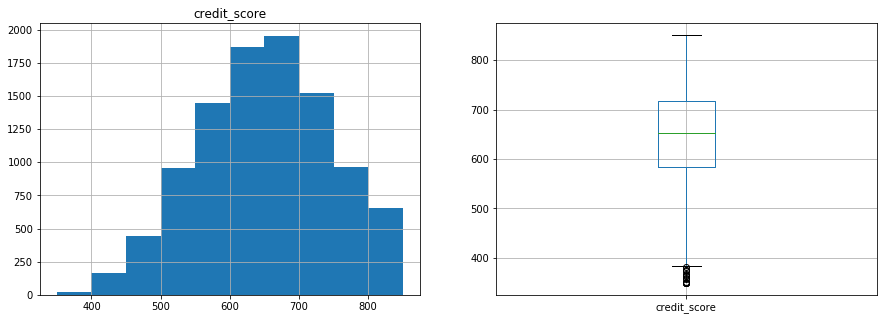

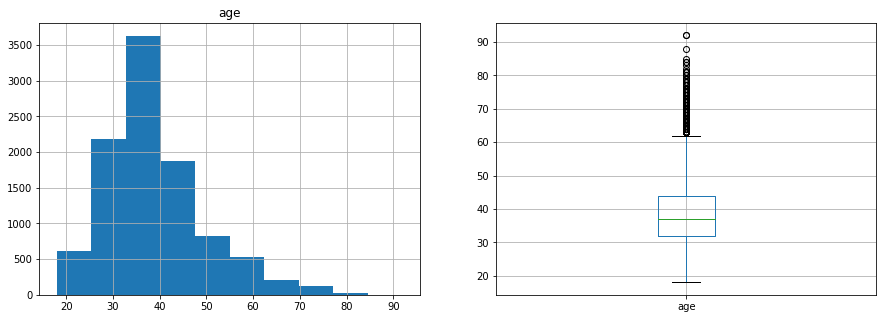

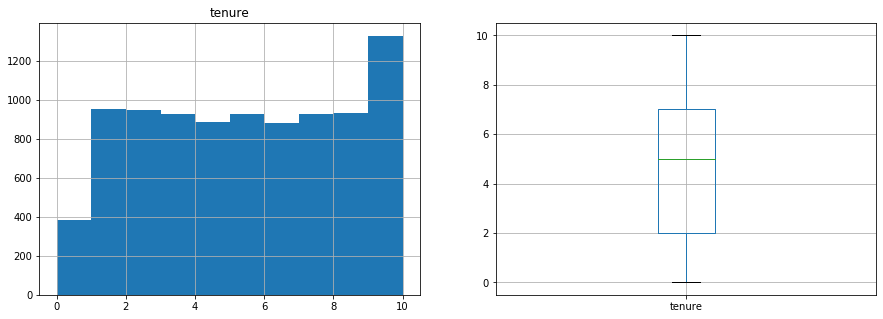

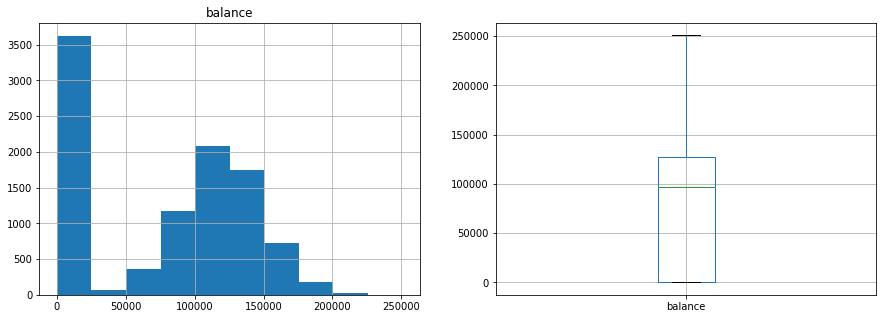

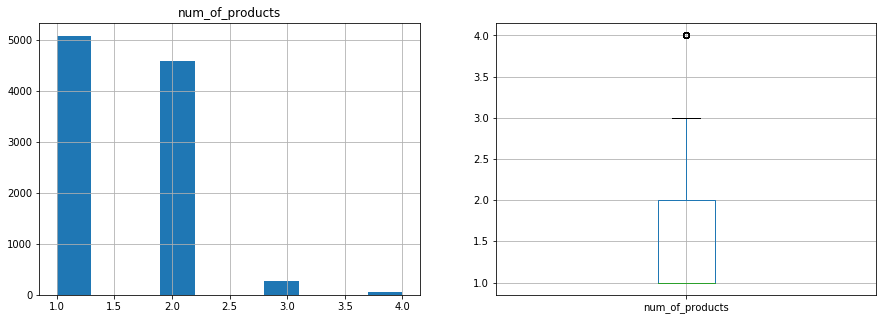

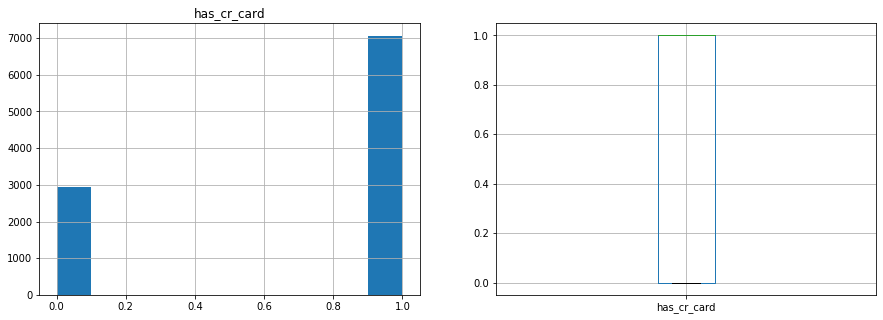

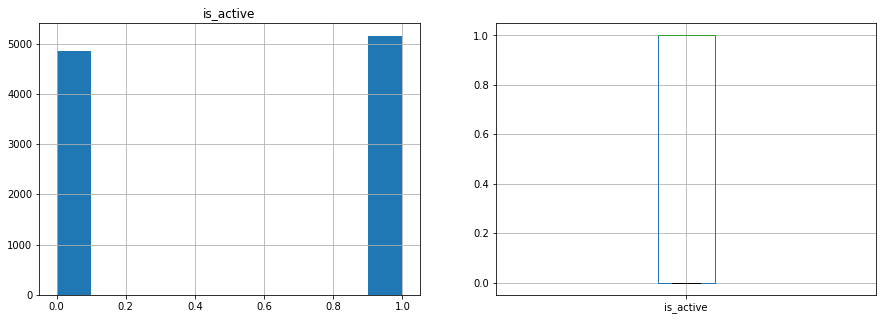

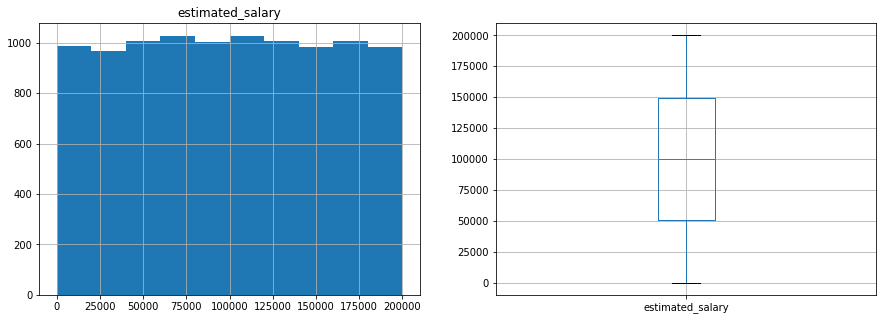

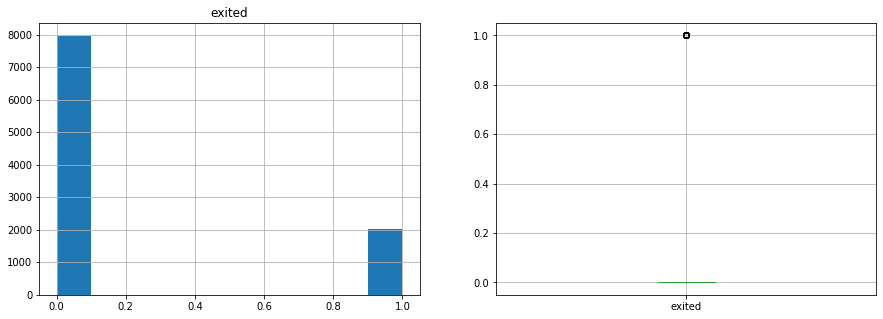

In [12]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df[i].hist()
    plt.title(i)

    plt.subplot(1,2,2)
    df.boxplot(i)
    plt.show()

* Средний возрас клиента составляет 37 лет, половине клиентов от 32 до 44 лет.  
* Распределение клиентов по длительности обслуживания в интервале от 1 до 9 лет равномерное и составляет около 900-1000 человек на каждый год. Количество клиентов, обслуживающихся менее одного года существенно ниже (около 400). Возможно, выгрузка данных была произведена не в конце года и на период до одного года попали новые клиенты, начавшие обслуживаться в банке с начала года и до даты выгрузки. Количество клиентов, обслуживающихся 10 лет не типично высокое, скорее всего в данную группу были объединены все клиенты, которые обслуживаются 10 лет и более.  
* Около 35% клиентов имеют баланс менее 25 000. Распределение баланса по остальным клиентам (от 25 000 до 250 000) близко к нормальному.  
* Кредитные карты банка есть у 70% клиентов.  
* В основном клиенты пользуются одним или двумя продуктами банка.  
* Активными являются примерно половина клиентов.  
* Предполагаемая заработная плата достаточно ровно распределена для каждого из выделенных интервалов от 0 до 200 000 у.е.  
* Факт ухода для рассматриваемой выборки отмечается для 20% клиентов. Т.к. данный признак является целевым, необходимо отметить наличие дисбаланса классов. 


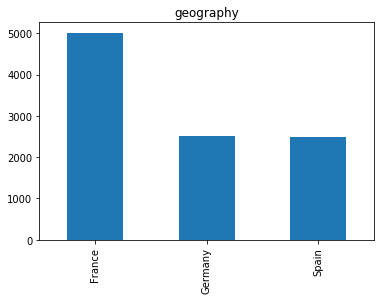

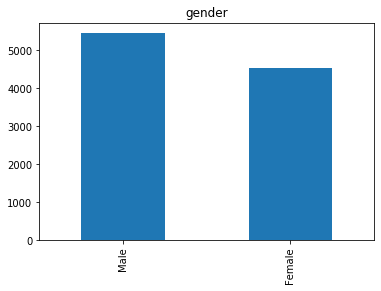

In [13]:
for i in df.select_dtypes(include='object').columns:
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

Примерно половина клиентов из Франции, оставшаяся часть проживают в Германии и Испании. Мужчин среди клиентов незначительно выше, чем женщин.

In [14]:
df.corr()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active,estimated_salary,exited
credit_score,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Признаки, высококоррелирующие с целевым признаков или друг с другом не отмечаются.

In [15]:
df.dtypes

credit_score          int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active             int64
estimated_salary    float64
exited                int64
dtype: object

Два признака являются категориальными, преобразуем их техникой OHE.

In [16]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разобьем данные на три выборки: обучающую, валидационную и тестовую в соотношении 3:1:1.

In [17]:
df_train, df_valid_and_test = train_test_split(df_ohe, test_size=0.4, random_state=123)
df_valid, df_test = train_test_split(df_valid_and_test, test_size=0.5, random_state=123)

In [18]:
print(f'Размер обучающей выборки: {df_train.shape[0]}; доля обучающей выборки {round(df_train.shape[0]/df_ohe.shape[0] * 100, 1)}%')
print(f'Размер валидационной выборки: {df_valid.shape[0]}; доля валидационной выборки {round(df_valid.shape[0]/df_ohe.shape[0] * 100, 1)}%')
print(f'Размер тестовой выборки: {df_test.shape[0]}; доля тестовой выборки {round(df_test.shape[0]/df_ohe.shape[0] * 100, 1)}%')

Размер обучающей выборки: 6000; доля обучающей выборки 60.0%
Размер валидационной выборки: 2000; доля валидационной выборки 20.0%
Размер тестовой выборки: 2000; доля тестовой выборки 20.0%


In [19]:
X_train = df_train.drop('exited', axis=1)
y_train = df_train['exited']

X_valid = df_valid.drop('exited', axis=1)
y_valid = df_valid['exited']

X_test = df_test.drop('exited', axis=1)
y_test = df_test['exited']

Заполним пропуски по столбцу `tenure` медианным значением обучающей выборки.

In [20]:
X_train['tenure'].fillna(X_train['tenure'].median(), inplace=True)
X_valid['tenure'].fillna(X_train['tenure'].median(), inplace=True)
X_test['tenure'].fillna(X_train['tenure'].median(), inplace=True)

Произведем масштабирование количественных признаков, за исключением бинарных.

In [21]:
scaler = StandardScaler()

col_for_scal = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(X_train[col_for_scal])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
X_train[col_for_scal] = scaler.transform(X_train[col_for_scal])
X_valid[col_for_scal] = scaler.transform(X_valid[col_for_scal])
X_test[col_for_scal] = scaler.transform(X_test[col_for_scal])

### Выводы
На этапе подготовки данных удалены лишние столбы, данные разделены на обучающую, валидационную и тестовую выборки, заполнены пропуски по столбцу `tenure` медианным значением, категориалные признаки переведены в количественные с исользованием техники OHE, ряд количественных признаков (за исключением бинарных) масштабированы.

## Исследование задачи

На этапе подготовки был отмечен факт дисбаланса классов. Около 80% данных относятся к классу 0 - оставшиеся клиенты,  20% к классу 1 - ушедшие клиенты.

In [23]:
df_ohe['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Вначале произведем обучение моделей и подбор гиперпараметров без учета дисбаланса

Исследуем модель Решающего Дерева, для подбора лучшей модели будем варьировать гиперпараметр - max_depth. 

In [24]:
def dtc(X_train, y_train, X_valid, y_valid, class_weight=None, upsample=None):
    best_f1_dt = 0
    list_depth=[]
    list_f1=[]
    for depth in range(1,16):
        model = DecisionTreeClassifier(max_depth = depth, class_weight=class_weight, random_state=123)
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)
        f1 = f1_score(y_valid, predictions)
        list_depth.append(depth)
        list_f1.append(f1)
        if f1 > best_f1_dt:
            best_model_dt = model
            best_f1_dt = f1
            best_depth = depth
            con_matrix = confusion_matrix(y_valid, predictions)

    sns.barplot(list_depth, list_f1)
    plt.xlabel('depth')
    plt.ylabel('f1_score')
    plt.grid()
    plt.show();

    print(f'F1-мера лучшей модели на валидационной выборке: {best_f1_dt:.3f}')
    print(f'Глубина лучшей модели на валидационной выборке: {best_depth}')
    print(f'Матрица ошибок: \n{con_matrix}')

    return best_model_dt

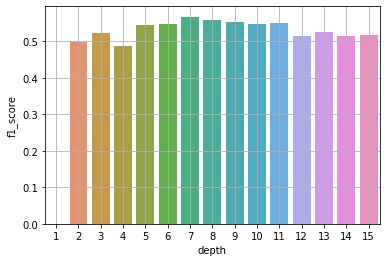

F1-мера лучшей модели на валидационной выборке: 0.567
Глубина лучшей модели на валидационной выборке: 7
Матрица ошибок: 
[[1548   58]
 [ 215  179]]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [25]:
dtc(X_train, y_train, X_valid, y_valid)

Исследуем модель Случайного Леса для разных значений гиперпараметров: n_estimators и max_depth 

In [26]:

def rfc(X_train, y_train, X_valid, y_valid, class_weight=None):
    best_f1_rf = 0
    list_est=[]
    list_depth=[]
    list_f1=[]
    for est in range(10, 101, 10):
        for depth in range(1,16):
            model = RandomForestClassifier(n_estimators=est, max_depth = depth, class_weight=class_weight, random_state=123)
            model.fit(X_train, y_train)
            predictions = model.predict(X_valid)
            f1 = f1_score(y_valid, predictions)
            list_est.append(est)
            list_depth.append(depth)
            list_f1.append(f1)
            if f1 > best_f1_rf:
                best_model_rf = model
                best_f1_rf = f1
                best_est = est
                best_depth = depth
                con_matrix = confusion_matrix(y_valid, predictions)

    plt.figure(figsize=(15,6))
    (sns.heatmap(pd.DataFrame({'est':list_est, 'depth':list_depth, 'f1':list_f1}).
    pivot_table(index='est', columns='depth', values='f1'), cmap='RdYlGn', annot=True, fmt='0.3f'))
    plt.show();

    print(f'F1-мера лучшей модели на валидационной выборке: {best_f1_rf:.3f}')
    print(f'Количество деревьев лучшей модели на валидационной выборке: {best_est}')
    print(f'Глубина лучшей модели на валидационной выборке: {best_depth}')
    print(f'Матрица ошибок: \n{con_matrix}')

    return best_model_rf

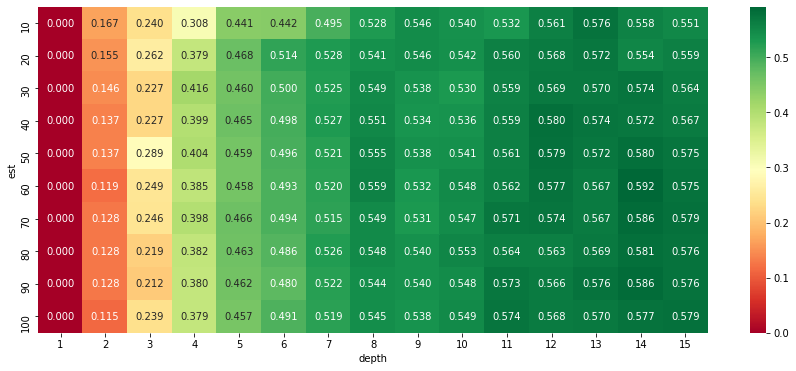

F1-мера лучшей модели на валидационной выборке: 0.592
Количество деревьев лучшей модели на валидационной выборке: 60
Глубина лучшей модели на валидационной выборке: 14
Матрица ошибок: 
[[1550   56]
 [ 205  189]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [27]:
rfc(X_train, y_train, X_valid, y_valid, class_weight=None)

Построим модель Логистической Регрессии и переберем различные значения порога

In [28]:
def lrc(X_train, y_train, X_valid, y_valid, class_weight=None):
    model_lr = LogisticRegression(solver='liblinear', class_weight=class_weight, random_state=123)
    model_lr.fit(X_train, y_train)
    probabilities_one_valid = model_lr.predict_proba(X_valid)[:, 1]

    best_f1_lr = 0
    list_threshold=[]
    list_f1=[]
    for threshold in np.arange(0, 0.81, 0.025):
        predicted_valid = probabilities_one_valid > threshold 
        f1 = f1_score(y_valid, predicted_valid)
        list_threshold.append(round(threshold,3))
        list_f1.append(f1)
        if f1 > best_f1_lr:
            best_f1_lr = f1
            best_threshold = threshold
            con_matrix = confusion_matrix(y_valid, predicted_valid)

    sns.barplot(list_threshold, list_f1)
    plt.xlabel('threshold')
    plt.ylabel('f1_score')
    plt.xticks(rotation=90)
    plt.grid()
    plt.show();

    print(f'F1-мера лучшей модели на валидационной выборке: {best_f1_lr:.3f}')
    print(f'Порог для лучшей модели на валидационной выборке: {best_threshold:.3f}')
    print(f'Матрица ошибок: \n{con_matrix}')

    return model_lr, best_threshold


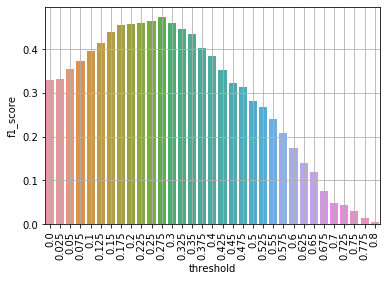

F1-мера лучшей модели на валидационной выборке: 0.473
Порог для лучшей модели на валидационной выборке: 0.275
Матрица ошибок: 
[[1306  300]
 [ 179  215]]


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 0.275)

In [29]:
lrc(X_train, y_train, X_valid, y_valid)

### Выводы
Были исследованы модели Решающего Дерева, Случайного Леса и Логистической Регрессии без балансировки классов. Для каждой модели были подобраны оптимальные гиперпараметры с точки зрения максимизации метрики f1-мера на валидационной выборке. Из рассмотренных моделей максимальная метрика f1 для валидационной выборки получена для модели Случайного Леса с гиперпараметрами n_estimators=60 и max_depth=14.

## Борьба с дисбалансом

Для борьбы с дисбалансом классов применим аргумент class_weight='balanced' для моделей Решающего Дерева, Случайного Леса и Логистической Регрессии

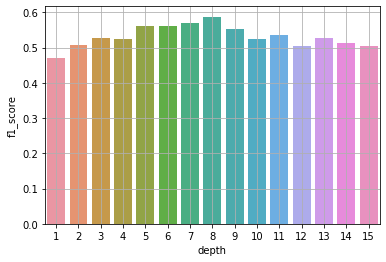

F1-мера лучшей модели на валидационной выборке: 0.587
Глубина лучшей модели на валидационной выборке: 8
Матрица ошибок: 
[[1305  301]
 [ 105  289]]


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [30]:
dtc(X_train, y_train, X_valid, y_valid, class_weight='balanced')

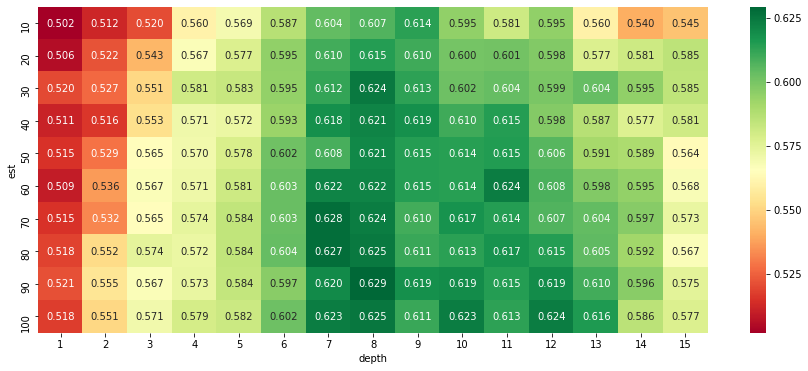

F1-мера лучшей модели на валидационной выборке: 0.629
Количество деревьев лучшей модели на валидационной выборке: 90
Глубина лучшей модели на валидационной выборке: 8
Матрица ошибок: 
[[1401  205]
 [ 119  275]]


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=90, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [31]:
rfc(X_train, y_train, X_valid, y_valid, class_weight='balanced')

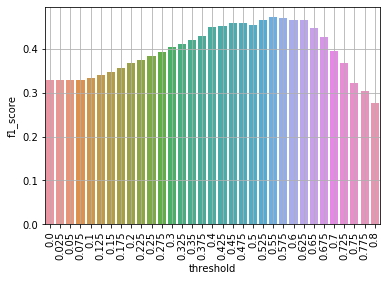

F1-мера лучшей модели на валидационной выборке: 0.472
Порог для лучшей модели на валидационной выборке: 0.550
Матрица ошибок: 
[[1237  369]
 [ 158  236]]


(LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 0.55)

In [32]:
lrc(X_train, y_train, X_valid, y_valid, class_weight='balanced')

Применение аргумента class_weight='balanced' позволило увеличить f1-меру для модели Решающего дерева с 0,567 до 0,587, для модели Случайного Леса с 0,592 до 0,629. Для Логистической Регрессии применение данного аргументо практически не изменило максимально достигнутое значение f1-меры.

Также попробуем применить технику upsampling для балансировки классов

In [33]:
repeat = round(y_train[y_train == 0].shape[0]/y_train[y_train == 1].shape[0])
X_train_ones = X_train[y_train == 1]
X_train_zeros = X_train[y_train == 0]
y_train_ones = y_train[y_train == 1]
y_train_zeros = y_train[y_train == 0]

X_upsampled = pd.concat([X_train_zeros] + [X_train_ones] * repeat)
y_upsampled = pd.concat([y_train_zeros] + [y_train_ones] * repeat)

X_upsampled, y_upsampled = shuffle(
    X_upsampled, y_upsampled, random_state=123)

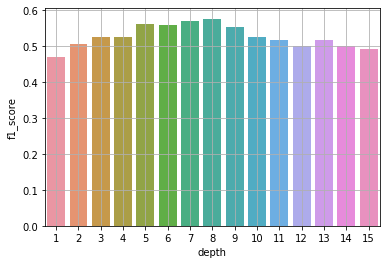

F1-мера лучшей модели на валидационной выборке: 0.577
Глубина лучшей модели на валидационной выборке: 8
Матрица ошибок: 
[[1280  326]
 [ 102  292]]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [34]:
dtc(X_upsampled, y_upsampled, X_valid, y_valid)

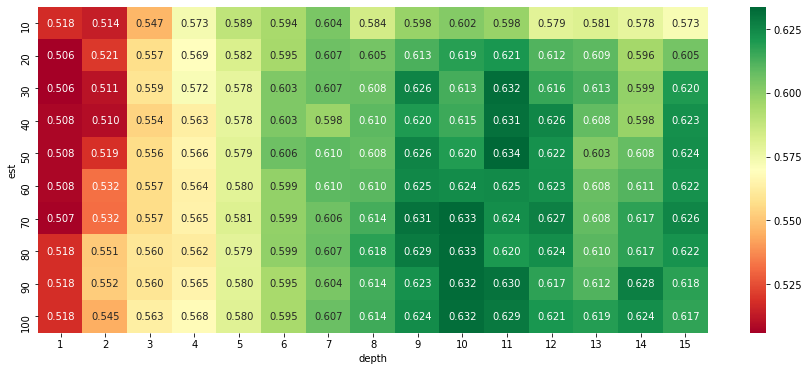

F1-мера лучшей модели на валидационной выборке: 0.634
Количество деревьев лучшей модели на валидационной выборке: 50
Глубина лучшей модели на валидационной выборке: 11
Матрица ошибок: 
[[1418  188]
 [ 124  270]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [35]:
rfc(X_upsampled, y_upsampled, X_valid, y_valid)

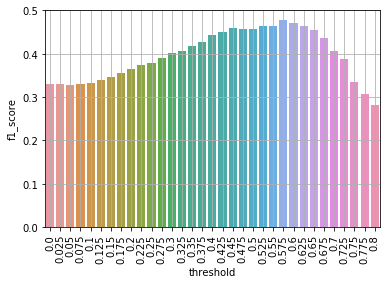

F1-мера лучшей модели на валидационной выборке: 0.478
Порог для лучшей модели на валидационной выборке: 0.575
Матрица ошибок: 
[[1267  339]
 [ 164  230]]


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 0.5750000000000001)

In [36]:
lrc(X_upsampled, y_upsampled, X_valid, y_valid)

Применение техники upsampling позволило увеличить f1-меру для модели Случайного Леса с 0,629, полученного при балансировке классов с помощью аргумента class_weight='balanced' до 0,634. Для Решающего Дерева и Логистической Регрессии применение аргумента class_weight='balanced' оказалось более оправданным.

### Выводы  
Были исследованы модели Решающего Дерева, Случайного Леса и Логистической Регрессии с балансировкой техникой upsampling и использованием аргумента class_weight='balanced'. Для каждой модели были подобраны оптимальные гиперпараметры с точки зрения максимизации метрики f1-мера на валидационной выборке. Из рассмотренных моделей максимальная метрика f1 получена для модели Случайного Леса при балансировке методом upsampling и гиперпараметрами n_estimators=50 и max_depth=11.

## Тестирование модели

In [37]:
best_model = RandomForestClassifier(n_estimators=50, max_depth=11, random_state=123)
best_model.fit(X_upsampled, y_upsampled)
test_predictions = best_model.predict(X_test)

In [38]:
f1_score(y_test, test_predictions)

0.6307339449541285

In [39]:
probabilities_one_test = best_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, probabilities_one_test)

0.8612434551725849

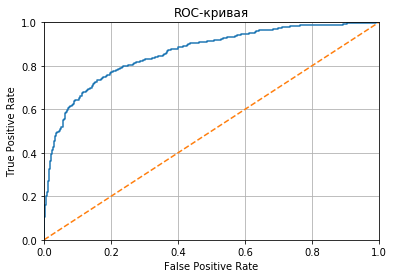

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.title('ROC-кривая')
plt.show()

### Выводы
Для тестовой выборки получено значение f1-меры, равное 0,631, что практически соответствует метрике f1, полученной на валидационной выборке (0,634) и свидетельствует о стабильной работе модели на новых данных.  
Значение метрики roc-auc 0,861, а также форма ROC-кривой свидетельствуют об адекватности модели.

## Выводы

Были проанализированы данные по оттоку клиентов банка и построены модели машинного обучения без балансировки и с балансировкой классов с различными значениями гиперпараметров. Из рассмотренных моделей выбрана модель, характеризующаяся максимальной метрикой f1-мера на валидационной выборке - модель Случайного Леса с балансировкой классов техникой umpsamplung и гиперпараметрами n_estimators=50 и max_depth=11. На тестовой выборке модель имеет значение f1-меры - 0,631, roc-auc - 0.861.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*